In [1]:
import uproot 
import hist
import sys
import os
import numpy as np 

import g2fit
from g2fit import analysis, fitting, helpers, scans
from g2_analysis import configuration
from g2_analysis import analysis as an

import matplotlib.pyplot as plt
import matplotlib

In [2]:
dataset = 'gm2pro_daq_offline_dqc_run4U_5307A'
indir = f'../datasets/{dataset}/'
assert os.path.exists(indir)

config = configuration.AnalysisConfig(os.path.join(indir,f'config_{dataset}.toml'))
print(config)

In [3]:
config['fitting']['fits']['5']['params']

[['N', 10000000.0, 'None', 'None', False],
 ['$A_{0}$', 0.333, 'None', 'None', False],
 ['R', 22, 'None', 'None', False],
 ['$\tau$', 64.44, 10, 100, False],
 ['$\\phi$', 3.14, 0, 6.28318530717958, False]]

In [4]:
config['fitting']['fits']['13']['params']

[['$\tau_{cbo}$', 200, 1, 1000, False],
 ['$\\omega_{cbo}$', 2.32, 'None', 'None', False],
 ['$A_{NX11}$', 0.001, 0, 'None', False],
 ['$\\phi_{NX11}$', 1.1, 0, 6.28318530717958, False]]

In [5]:
thisan = an.PrecessionAnalysis(config)

In [6]:
thisan.config['blinding_file']

'/home/jlab/github/g2_analysis/default.phrase'

In [7]:
corrected = thisan.apply_pileup_correction()

In [8]:
corrected

In [9]:
h = corrected.clusters
h

Hist(
  Regular(4464, 0, 665.984, name='xaxis', label='time [#mus]'),
  Regular(300, 0, 6000, name='yaxis', label=' energy [MeV]'),
  Regular(24, 1, 25, name='zaxis', label=' caloNum; n clusters'),
  storage=Double()) # Sum: 11053247689.833334 (11264838357.833334 with flow)

In [10]:
h.axes[0].edges[200:220]

array([29.838  , 29.98719, 30.13638, 30.28557, 30.43476, 30.58395,
       30.73314, 30.88233, 31.03152, 31.18071, 31.3299 , 31.47909,
       31.62828, 31.77747, 31.92666, 32.07585, 32.22504, 32.37423,
       32.52342, 32.67261])

In [11]:
h.axes[0].centers[200:220]

array([29.912595, 30.061785, 30.210975, 30.360165, 30.509355, 30.658545,
       30.807735, 30.956925, 31.106115, 31.255305, 31.404495, 31.553685,
       31.702875, 31.852065, 32.001255, 32.150445, 32.299635, 32.448825,
       32.598015, 32.747205])

In [12]:
# fig,ax = plt.subplots()
# h[30j:30.3j,1700j:3200j:sum,::sum].plot()
# plt.plot([30.1384,30.1384], ax.get_ylim())
# plt.show()

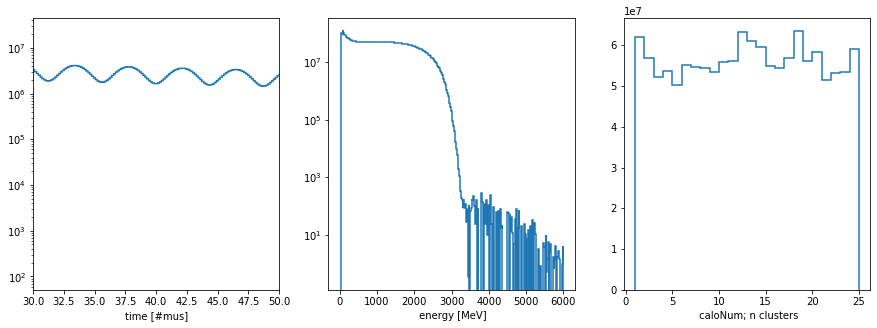

In [13]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
h[:,hist.loc(1700):hist.loc(3200):sum,::sum].plot(ax=ax[0])
ax[0].set_yscale("log")
ax[0].set_xlim(30,50)

h[hist.loc(30):hist.loc(650):sum,:,::sum].plot(ax=ax[1])
ax[1].set_yscale("log")

h[hist.loc(30):hist.loc(650):sum,hist.loc(1700):hist.loc(3200):sum,:].plot(ax=ax[2])
# ax[2].set_yscale("log")
plt.show()

---

### Do a first 5-par fit

In [14]:
params = config['fitting']['fits']['5']
params

{'complete': False, 'params': [['N', 10000000.0, 'None', 'None', False], ['$A_{0}$', 0.333, 'None', 'None', False], ['R', 22, 'None', 'None', False], ['$\tau$', 64.44, 10, 100, False], ['$\\phi$', 3.14, 0, 6.28318530717958, False]], 'function_file': '/home/jlab/github/g2_analysis/datasets/gm2pro_daq_offline_dqc_run4U_5307A/fits/fit_function_5_2779000227388844764.pickle', 't': {'fitted_params': [['N', 5000942.766994657, -inf, inf, False], ['$A_{0}$', 0.38481876377383206, -inf, inf, False], ['R', -64.29877577122829, -inf, inf, False], ['$\tau$', 64.40780570084904, 10.0, 100.0, False], ['$\\phi$', 5.30105942295462, 0.0, 6.28318530717958, False]], 'fitted_errors': [242.99417500311128, 3.614217568975896e-05, 1.0586548400390565, 0.0017605246334824187, 0.00017386943446329184], 'fitted_cov': [[59046.16908544267, 0.00017612073221964957, -0.23274564248316035, -0.3541616781888033, 4.506956429427013e-05], [0.00017612073221964957, 1.3062568635894035e-09, 2.019368678384956e-07, -9.215223824854221e-1

In [15]:
this_fit, these_params = thisan.prepare_fit_function('5')

{'complete': False, 'params': [['N', 10000000.0, 'None', 'None', False], ['$A_{0}$', 0.333, 'None', 'None', False], ['R', 22, 'None', 'None', False], ['$\tau$', 64.44, 10, 100, False], ['$\\phi$', 3.14, 0, 6.28318530717958, False]], 'function_file': '/home/jlab/github/g2_analysis/datasets/gm2pro_daq_offline_dqc_run4U_5307A/fits/fit_function_5_2779000227388844764.pickle', 't': {'fitted_params': [['N', 5000942.766994657, -inf, inf, False], ['$A_{0}$', 0.38481876377383206, -inf, inf, False], ['R', -64.29877577122829, -inf, inf, False], ['$\tau$', 64.40780570084904, 10.0, 100.0, False], ['$\\phi$', 5.30105942295462, 0.0, 6.28318530717958, False]], 'fitted_errors': [242.99417500311128, 3.614217568975896e-05, 1.0586548400390565, 0.0017605246334824187, 0.00017386943446329184], 'fitted_cov': [[59046.16908544267, 0.00017612073221964957, -0.23274564248316035, -0.3541616781888033, 4.506956429427013e-05], [0.00017612073221964957, 1.3062568635894035e-09, 2.019368678384956e-07, -9.215223824854221e-1

In [16]:
print(this_fit)

In [17]:
this_fit.params

['N', '$A_{0}$', 'R', '$\tau$', '$\\phi$']

In [18]:
this_fit.blind

In [19]:
this_fit.re_init()

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [20]:
this_fit(12,[1e7,0.2,22,64,0])

8297543.752424758

In [21]:
# this_fit, these_params = thisan.prepare_fit_function('13')

In [22]:
this_fit(np.array([1,2,3,4,5]), [1e7, 0.333, 22, 64.4, 0])

array([ 9416779.90345776, 12811779.72711627, 10764389.48721749,
        6689870.49951554,  7372783.98750563])

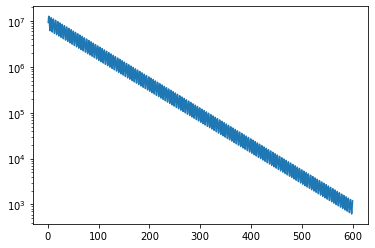

In [23]:
fig,ax = plt.subplots()
xs = np.linspace(1,600,6000)
ys = this_fit(xs, [1e7, 0.333, 22, 64.4, 0])
plt.plot(xs,ys)
plt.yscale("log")
plt.show()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f790d86e890>, errorbar=None, legend_artist=None)]

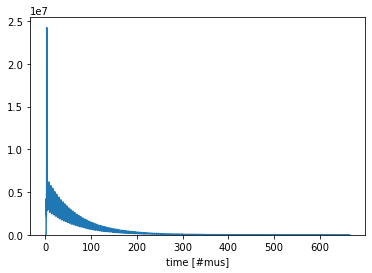

In [24]:
hi = thisan.prepare_histogram(thisan.config['fitting'])
hi.plot()

In [25]:
ding = thisan.get_fit_params('5')
par_lim_low = ding['limlow']
[x if ('None' not in str(x)) else None for x in par_lim_low ]

[-inf, -inf, -inf, 10.0, 0.0]

In [26]:
thisfit = thisan.prepare_fit()

{'complete': False, 'params': [['N', 10000000.0, 'None', 'None', False], ['$A_{0}$', 0.333, 'None', 'None', False], ['R', 22, 'None', 'None', False], ['$\tau$', 64.44, 10, 100, False], ['$\\phi$', 3.14, 0, 6.28318530717958, False]], 'function_file': '/home/jlab/github/g2_analysis/datasets/gm2pro_daq_offline_dqc_run4U_5307A/fits/fit_function_5_2779000227388844764.pickle', 't': {'fitted_params': [['N', 5000942.766994657, -inf, inf, False], ['$A_{0}$', 0.38481876377383206, -inf, inf, False], ['R', -64.29877577122829, -inf, inf, False], ['$\tau$', 64.40780570084904, 10.0, 100.0, False], ['$\\phi$', 5.30105942295462, 0.0, 6.28318530717958, False]], 'fitted_errors': [242.99417500311128, 3.614217568975896e-05, 1.0586548400390565, 0.0017605246334824187, 0.00017386943446329184], 'fitted_cov': [[59046.16908544267, 0.00017612073221964957, -0.23274564248316035, -0.3541616781888033, 4.506956429427013e-05], [0.00017612073221964957, 1.3062568635894035e-09, 2.019368678384956e-07, -9.215223824854221e-1

In [27]:
thisfit.m

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,N,5.00e6,0.05e6,,,,,
1,$A_{0}$,0.385,0.004,,,,,
2,R,-64.3,-0.6,,,,,
3,$ au$,64.4,0.6,,,10,100,
4,$\phi$,5.30,0.05,,,0,6.28,


/home/jlab/github/g2_analysis/submodules/g2fit/fitting.py:345: RuntimeWarning: invalid value encountered in remainder
  plt.plot(xs % mod, ys, color='C1',label=label2)
/home/jlab/github/g2_analysis/submodules/g2fit/fitting.py:345: RuntimeWarning: invalid value encountered in remainder
  plt.plot(xs % mod, ys, color='C1',label=label2)


[['$\\chi^{2}/NDF$', 'N/A (Fit not executed)', ''], ['N', '5.001e+06', '5.001e+04'], ['$A_{0}$', '3.848e-01', '3.848e-03'], ['R', '-6.430e+01', '-6.430e-01'], ['$\\tau$', '6.441e+01', '6.441e-01'], ['$\\phi$', '5.301e+00', '5.301e-02']]


(<Figure size 1008x576 with 3 Axes>,
 array([<AxesSubplot:label='0', xlabel='Time % 100 $\\mu s$'>,
        <AxesSubplot:label='1', xlabel='Frequency [MHz]'>,
        <AxesSubplot:label='2'>], dtype=object))

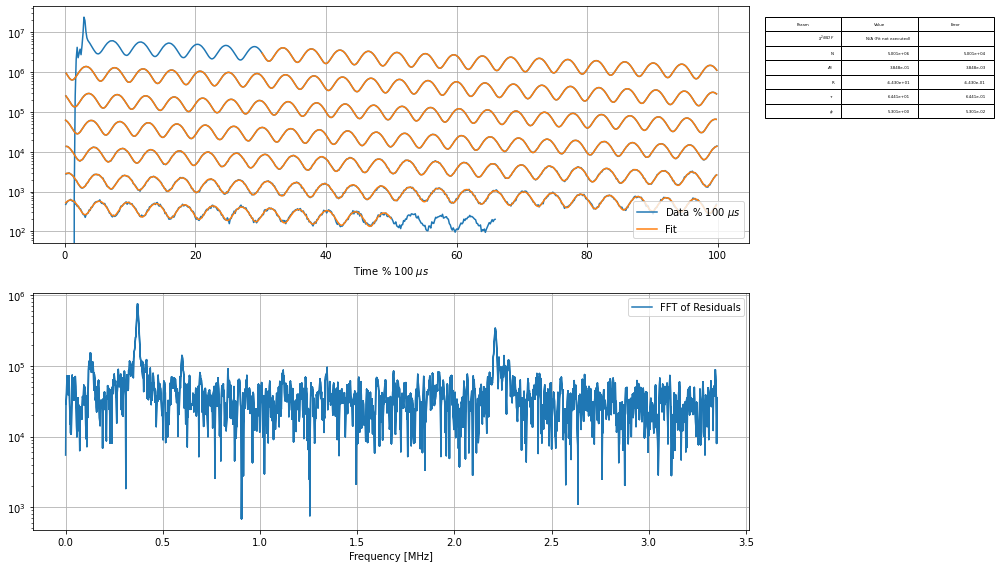

In [28]:
thisfit.pretty_plot()

In [29]:
thisfit.fit()

In [30]:
thisfit.m

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5427 (chi2/ndof = 1.3)     │              Nfcn = 341              │
│ EDM = 1.44e-05 (Goal: 0.0002)    │            time = 1.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N       │ 5.00094e6 │ 0.00024e6 │ -0.00024e6 │ 0.00024e6  │         │         │       │
│ 1 │ $A_{0}$ │ 384.82e-3 │  0.04e-3  │  -0.04e-3  │  0.04e-3   │         │         │       │
│ 2 │ R       │   -64.3   │    1.1    │    -1.0    │    1.1     │         │         │       │
│ 3 │ $	au$   │  64.4078  │  0.0018   │  -0.0018   │   0.0018   │   10    │   100   │       │
│ 4 │ $\phi$  │  5.30106  │  0.00017  │  -0.00017  │  0.00017   │    0    │ 6.28319 │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           N           │        $A_{0}$        │           R           │         $	au$         │        $\phi$         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.24e3  │  0.24e3   │ -0.04e-3  │  0.04e-3  │   -1.0    │    1.1    │  -0.0018  │  0.0018   │ -0.17e-3  │  0.17e-3  │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌─────────┬───────────────────────────────────────────────────┐
│         │         N   $A_{0}$         R     $	au$    $\phi$ │
├─────────┼───────────────────────────────────────────────────┤
│       N │   5.9e+04  0.000176    -0.233    -0.354  4.51e-05 │
│ $A_{0}$ │  0.000176  1.31e-09  2.02e-07 -9.22e-10  -4.6e-11 │
│       R │    -0.233  2.02e-07      1.12  1.44e-06 -0.000152 │
│   $	au$ │    -0.354 -9.22e-10  1.44e-06   3.1e-06 -2.78e-10 │
│  $\phi$ │  4.51e-05  -4.6e-11 -0.000152 -2.78e-10  3.02e-08 │
└─────────┴───────────────────────────────────────────────────┘

/home/jlab/github/g2_analysis/submodules/g2fit/fitting.py:293: VisibleDeprecationWarning: propagate is deprecated: use jacobi.propagate instead from jacobi library
  _, ycov = propagate(ding, self.m.values, self.m.covariance)


jacobi: iter=3 no convergence
[2.02657014e+02 1.94802248e+02 1.85217396e+02 ... 8.44259166e-02
 8.51970793e-02 8.45020671e-02]


(<Figure size 1440x576 with 4 Axes>,
 {'A': <AxesSubplot:label='A'>,
  'D': <AxesSubplot:label='D'>,
  'B': <AxesSubplot:label='B'>,
  'C': <AxesSubplot:label='C'>})

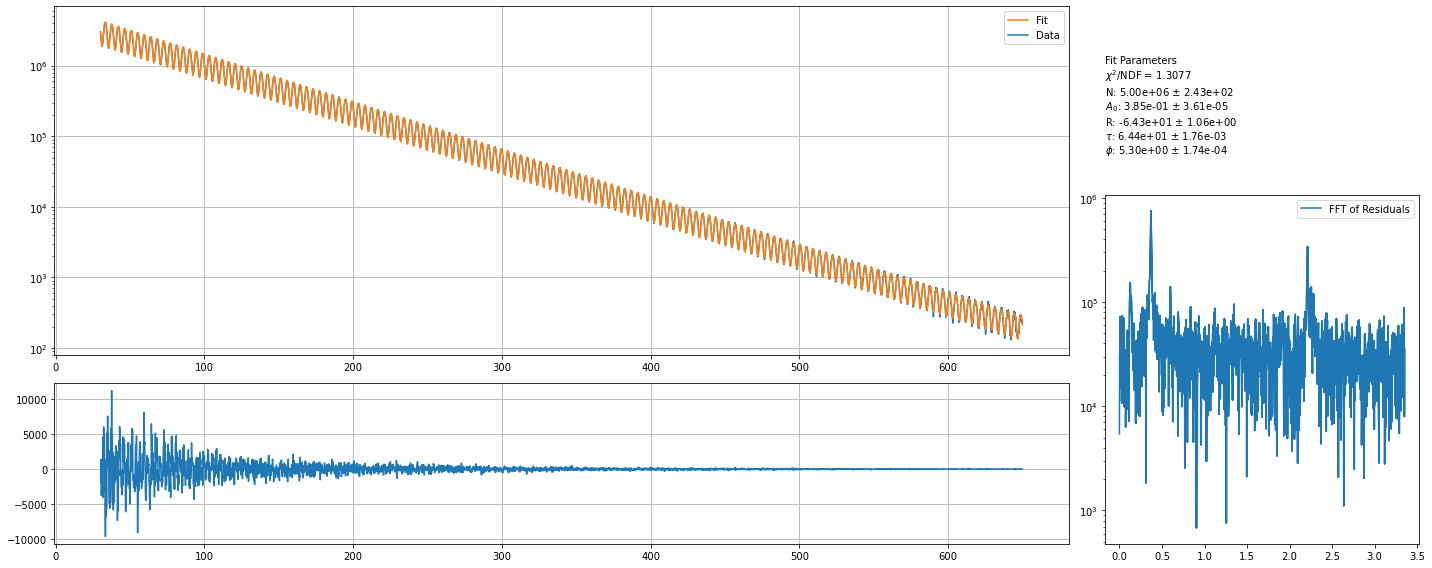

In [31]:
thisfit.plot()

In [32]:
thisan.update_fit('5', thisfit)

In [33]:
thisfit13 = thisan.prepare_fit('13')

{'complete': False, 'inherit_params': True, 'inherit_from': 5, 'params': [['$\tau_{cbo}$', 200, 1, 1000, False], ['$\\omega_{cbo}$', 2.32, 'None', 'None', False], ['$A_{NX11}$', 0.001, 0, 'None', False], ['$\\phi_{NX11}$', 1.1, 0, 6.28318530717958, False]]}
{'names': ('N', '$A_{0}$', 'R', '$\tau$', '$\\phi$', '$\tau_{cbo}$', '$\\omega_{cbo}$', '$A_{NX11}$', '$\\phi_{NX11}$'), 'guess': (5000942.823714068, 0.3848188401470068, -64.30000886172596, 64.40780586084063, 5.301059078254611, 200, 2.32, 0.001, 1.1), 'limlow': [-inf, -inf, -inf, 10.0, 0.0, 1, None, 0, 0], 'limhigh': [inf, inf, inf, 100.0, 6.28318530717958, 1000, None, None, 6.28318530717958], 'fixed': (False, False, False, False, False, False, False, False, False)}
Fitting with 9 parameters: ('N', '$A_{0}$', 'R', '$\tau$', '$\\phi$', '$\tau_{cbo}$', '$\\omega_{cbo}$', '$A_{NX11}$', '$\\phi_{NX11}$')
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                          

In [34]:
thisfit13.m.values[5] = 150
thisfit13.m.values[6] = 2.32
thisfit13.m.limits[5] = (100,None)

In [35]:
thisfit13.m

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,N,5.00e6,0.05e6,,,,,
1,$A_{0}$,0.385,0.004,,,,,
2,R,-64.3,-0.6,,,,,
3,$ au$,64.4,0.6,,,10,100,
4,$\phi$,5.30,0.05,,,0,6.28,
5,$ au_{cbo}$,150,2,,,100,,
6,$\omega_{cbo}$,2.320,0.023,,,,,
7,$A_{NX11}$,1.00e-3,0.01e-3,,,0,,
8,$\phi_{NX11}$,1.100,0.011,,,0,6.28,


In [36]:
thisfit13.fit()

In [37]:
thisfit13.m

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4468 (chi2/ndof = 1.1)     │             Nfcn = 1725              │
│ EDM = 0.000234 (Goal: 0.0002)    │            time = 1.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name           │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N              │ 5.00105e6 │ 0.00024e6 │ -0.00024e6 │ 0.00024e6  │         │         │       │
│ 1 │ $A_{0}$        │ 384.81e-3 │  0.04e-3  │  -0.04e-3  │  0.04e-3   │         │         │       │
│ 2 │ R              │   -63.4   │    1.1    │    -1.1    │    1.0     │         │         │       │
│ 3 │ $	au$          │  64.4073  │  0.0018   │  -0.0018   │   0.0018   │   10    │   100   │       │
│ 4 │ $\phi$         │  5.30087  │  0.00017  │  -0.00017  │  0.00018   │    0    │ 6.28319 │       │
│ 5 │ $	au_{cbo}$    │    183    │    30     │    -26     │     34     │   100   │         │       │
│ 6 │ $\omega_{cbo}$ │  2.3260   │  0.0008   │  -0.0008   │   0.0008   │         │         │       │
│ 7 │ $A_{NX11}$     │  1.84e-3  │  0.13e-3  │  -0.12e-3  │  0.13e-3   │    0    │         │       │
│ 8 │ $\phi_{NX11}$  │   0.20    │   0.06    │   -0.06    │    0.06    │    0    │ 6.28319 │       │
└───┴────────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           N           │        $A_{0}$        │           R           │         $	au$         │        $\phi$         │      $	au_{cbo}$      │    $\omega_{cbo}$     │      $A_{NX11}$       │     $\phi_{NX11}$     │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.24e3  │  0.24e3   │ -0.04e-3  │  0.04e-3  │   -1.1    │    1.0    │  -0.0018  │  0.0018   │ -0.17e-3  │  0.18e-3  │    -26    │    34     │  -0.8e-3  │  0.8e-3   │ -0.12e-3  │  0.13e-3  │   -0.06   │   0.06    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   F

/home/jlab/github/g2_analysis/submodules/g2fit/fitting.py:345: RuntimeWarning: invalid value encountered in remainder
  plt.plot(xs % mod, ys, color='C1',label=label2)
/home/jlab/github/g2_analysis/submodules/g2fit/fitting.py:345: RuntimeWarning: invalid value encountered in remainder
  plt.plot(xs % mod, ys, color='C1',label=label2)


[['$\\chi^{2}/NDF$', '1.078e+00', ''], ['N', '5.001e+06', '2.431e+02'], ['$A_{0}$', '3.848e-01', '3.615e-05'], ['R', '-6.345e+01', '1.060e+00'], ['$\\tau$', '6.441e+01', '1.761e-03'], ['$\\phi$', '5.301e+00', '1.741e-04'], ['$\\tau_{cbo}$', '1.830e+02', '2.967e+01'], ['$\\omega_{cbo}$', '2.326e+00', '8.275e-04'], ['$A_{NX11}$', '1.845e-03', '1.268e-04'], ['$\\phi_{NX11}$', '1.952e-01', '6.484e-02']]


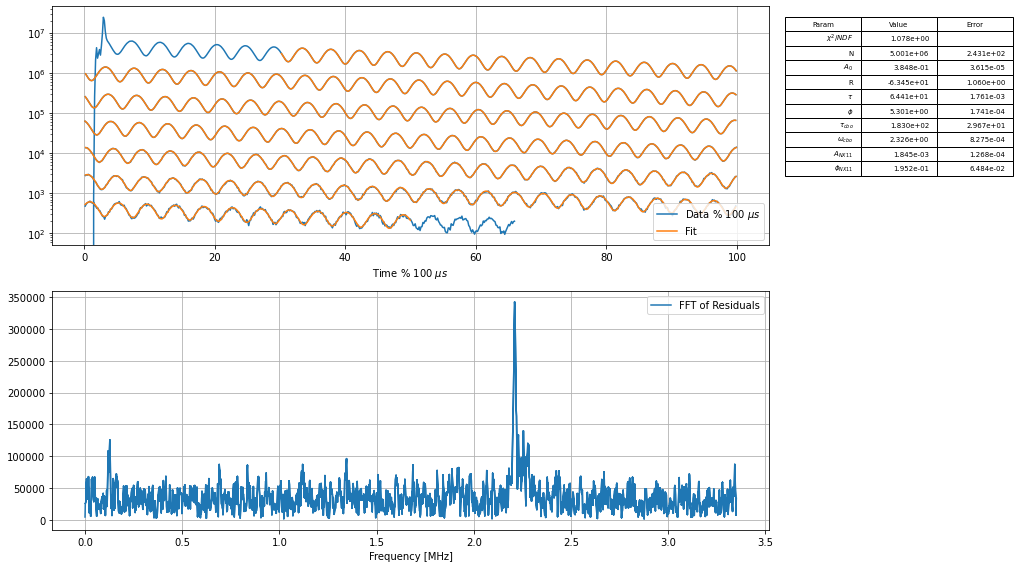

In [38]:
fig,ax = thisfit13.pretty_plot()
ax[1].set_yscale("linear")

(0.0, 0.5)

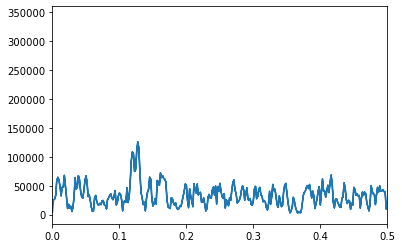

In [39]:
ding = thisfit13.fft()
plt.plot(*ding)
plt.xlim(0,0.5)

In [40]:
thisfit13.m

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4468 (chi2/ndof = 1.1)     │             Nfcn = 1725              │
│ EDM = 0.000234 (Goal: 0.0002)    │            time = 1.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name           │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N              │ 5.00105e6 │ 0.00024e6 │ -0.00024e6 │ 0.00024e6  │         │         │       │
│ 1 │ $A_{0}$        │ 384.81e-3 │  0.04e-3  │  -0.04e-3  │  0.04e-3   │         │         │       │
│ 2 │ R              │   -63.4   │    1.1    │    -1.1    │    1.0     │         │         │       │
│ 3 │ $	au$          │  64.4073  │  0.0018   │  -0.0018   │   0.0018   │   10    │   100   │       │
│ 4 │ $\phi$         │  5.30087  │  0.00017  │  -0.00017  │  0.00018   │    0    │ 6.28319 │       │
│ 5 │ $	au_{cbo}$    │    183    │    30     │    -26     │     34     │   100   │         │       │
│ 6 │ $\omega_{cbo}$ │  2.3260   │  0.0008   │  -0.0008   │   0.0008   │         │         │       │
│ 7 │ $A_{NX11}$     │  1.84e-3  │  0.13e-3  │  -0.12e-3  │  0.13e-3   │    0    │         │       │
│ 8 │ $\phi_{NX11}$  │   0.20    │   0.06    │   -0.06    │    0.06    │    0    │ 6.28319 │       │
└───┴────────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           N           │        $A_{0}$        │           R           │         $	au$         │        $\phi$         │      $	au_{cbo}$      │    $\omega_{cbo}$     │      $A_{NX11}$       │     $\phi_{NX11}$     │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.24e3  │  0.24e3   │ -0.04e-3  │  0.04e-3  │   -1.1    │    1.0    │  -0.0018  │  0.0018   │ -0.17e-3  │  0.18e-3  │    -26    │    34     │  -0.8e-3  │  0.8e-3   │ -0.12e-3  │  0.13e-3  │   -0.06   │   0.06    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   F

In [41]:
thisan.update_fit('13', thisfit13)